In [2]:
#clear all varaibles
%reset

In [3]:
# Basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from scipy.interpolate import interp1d

In [4]:
d0_en = []
d0_ang = []

# opening the CSV file  
with open('d_0.csv', mode ='r')as file:  
      
  # reading the CSV file  
  csvFile = csv.reader(file)  
    
  # displaying the contents of the CSV file  
  for lines in csvFile:  
        
        d0_en.append(float(lines[0]))
        d0_ang.append(float(lines[1]))

In [5]:
d2_en = []
d2_ang = []

# opening the CSV file  
with open('d_2.csv', mode ='r')as file:  
      
  # reading the CSV file  
  csvFile = csv.reader(file)  
    
  # displaying the contents of the CSV file  
  for lines in csvFile:  
        
        d2_en.append(float(lines[0]))
        d2_ang.append(float(lines[1]))

In [6]:
d4_en = []
d4_ang = []

# opening the CSV file  
with open('d_4.csv', mode ='r')as file:  
      
  # reading the CSV file  
  csvFile = csv.reader(file)  
    
  # displaying the contents of the CSV file  
  for lines in csvFile:  
        
        d4_en.append(float(lines[0]))
        d4_ang.append(float(lines[1]))

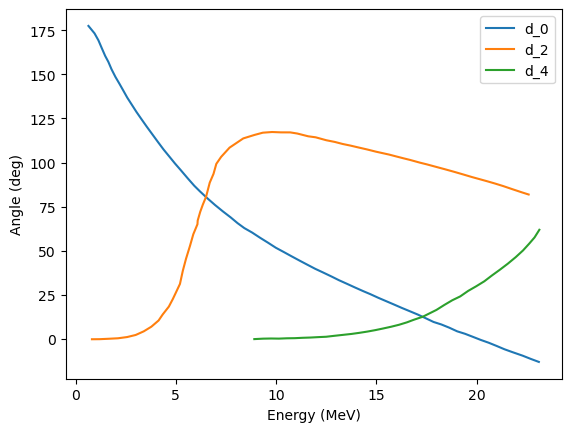

In [7]:
plt.Figure
plt.plot(d0_en, d0_ang, label="d_0")
plt.plot(d2_en, d2_ang, label="d_2")
plt.plot(d4_en, d4_ang, label="d_4")
plt.xlabel("Energy (MeV)")
plt.ylabel("Angle (deg)")
plt.legend(loc='upper right')

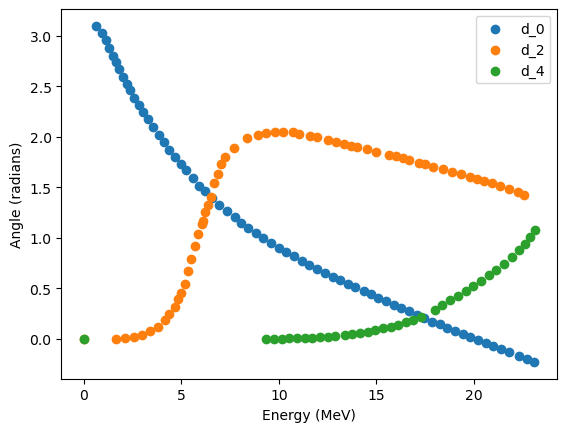

In [8]:
d4_en[0] = 0
d4_ang[0] = 0

d2_en[0] = 0
d2_ang[0] = 0

d2_en = np.delete(d2_en, 1)
d2_ang = np.delete(d2_ang, 1)


d0_rad = np.radians(d0_ang)
d2_rad = np.radians(d2_ang)
d4_rad = np.radians(d4_ang)

plt.Figure
plt.scatter(d0_en, d0_rad, label="d_0")
plt.scatter(d2_en, d2_rad, label="d_2")
plt.scatter(d4_en, d4_rad, label="d_4")
plt.xlabel("Energy (MeV)")
plt.ylabel("Angle (radians)")
plt.legend(loc='upper right')

In [9]:
d4_ang[0] = 0

common_energy = np.linspace(0, 21, 45)

interp_l0 = interp1d(d0_en, d0_rad, kind='linear', fill_value="extrapolate")
interp_l2 = interp1d(d2_en, d2_rad, kind='linear', fill_value="extrapolate")
interp_l4 = interp1d(d4_en, d4_rad, kind='linear', fill_value="extrapolate")

d_l0_interp = interp_l0(common_energy)
d_l2_interp = interp_l2(common_energy)
d_l4_interp = interp_l4(common_energy)

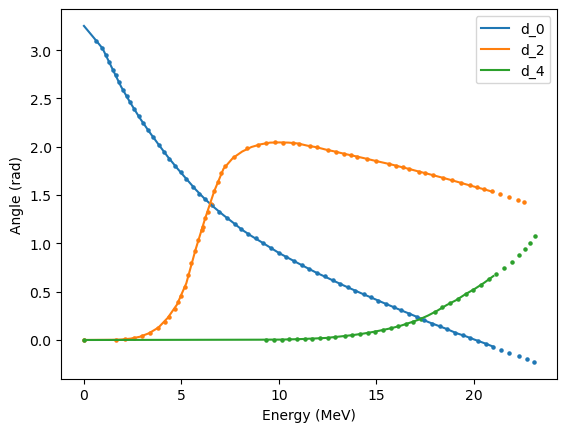

In [10]:
plt.Figure()
plt.plot(common_energy, d_l0_interp, label="d_0")
plt.plot(common_energy, d_l2_interp, label="d_2")
plt.plot(common_energy, d_l4_interp, label="d_4")
plt.scatter(d0_en, d0_rad, s=5)
plt.scatter(d2_en, d2_rad, s=5)
plt.scatter(d4_en, d4_rad, s=5)
plt.xlabel("Energy (MeV)")
plt.ylabel("Angle (rad)")
plt.legend(loc='upper right')

In [11]:
# Compute derivatives

d_delta_l0 = np.gradient(d_l0_interp, common_energy)
d_delta_l2 = np.gradient(d_l2_interp, common_energy)
d_delta_l4 = np.gradient(d_l4_interp, common_energy)

P_E = ((2*0+1) * np.abs(d_delta_l0) + (2*2+1) * np.abs(d_delta_l2) + (2*4+1) * np.abs(d_delta_l4))

# Normalize
P_E /= np.trapz(P_E, common_energy)

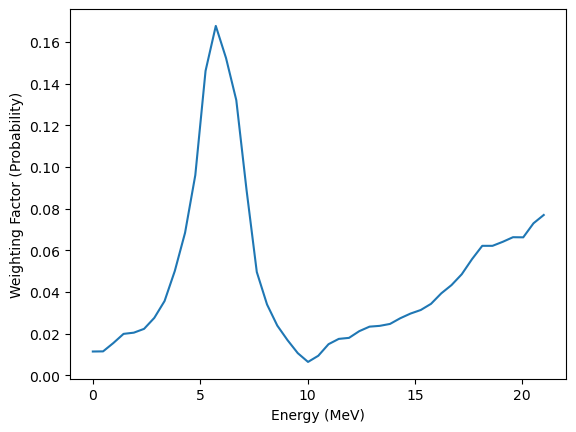

In [12]:
plt.plot(common_energy, P_E)
plt.xlabel("Energy (MeV)")
plt.ylabel("Weighting Factor (Probability)")
#plt.legend()
plt.show()

In [13]:
integral_check = np.trapz(P_E, common_energy)
integral_check

1.0

In [14]:
np.where(P_E == max(P_E))

(array([12]),)

In [15]:
common_energy[12]

5.7272727272727275

In [16]:
#test
common_energy

array([ 0.        ,  0.47727273,  0.95454545,  1.43181818,  1.90909091,
        2.38636364,  2.86363636,  3.34090909,  3.81818182,  4.29545455,
        4.77272727,  5.25      ,  5.72727273,  6.20454545,  6.68181818,
        7.15909091,  7.63636364,  8.11363636,  8.59090909,  9.06818182,
        9.54545455, 10.02272727, 10.5       , 10.97727273, 11.45454545,
       11.93181818, 12.40909091, 12.88636364, 13.36363636, 13.84090909,
       14.31818182, 14.79545455, 15.27272727, 15.75      , 16.22727273,
       16.70454545, 17.18181818, 17.65909091, 18.13636364, 18.61363636,
       19.09090909, 19.56818182, 20.04545455, 20.52272727, 21.        ])